# 사람의 인지적 활동에서의 뉴런 반응성 분석
> Analysis of Neuron Activity based on the theory of Brain Modularity. (during memory encoding and recognition) 

## Purpose of analysis

1. It does not provide novel insights of the association between consciousness activity(i.e., memorization/recognition) and neuron activity.

2. In the area of neuroscience, most of the conclusions derived from the cohort study (That is inductively. not deductively.)

3. Therefore, we just show the results that can support existing brain theories inductively. (Another cohort, And based on the coherentism)

## Data set
Dataset of human medial temproal lobel single neuron activity during declarative memory encoding and recognition
> 1) Faraut, M., Carlson, A., Sullivan, S. et al. Dataset of human medial temporal lobe single neuron activity during declarative memory encoding and recognition. Sci Data 5, 180010 (2018). https://doi.org/10.1038/sdata.2018.10


## Data set Review
![data_set review](data_set_review.png)

**인지 및 기억 작업중에 왼쪽 편도체(Left amygdala), 오른쪽 편도체(Right amygdala), 왼쪽 해마(Left hippocampus), 그리고 오른쪽 해마(Right hippocampus)에 존재하는 뉴런의 반응성 (firing rate)을 기록.**
+ 1: 새로본 것 (Confident)
+ 2: 새로본 것 (Probably)
+ 3: 새로본 것 (Guess)
+ 4: 이전에 본 것 (Guess)
+ 5: 이전에 본 것 (Probably)
+ 6: 이전에 본 것 (Confident)

# Review of Brain modularity
![brain_module_review](brain_module_review.png)

**오른쪽 모듈은 시각적 자극에 더욱 잘 활성화됨.**

**왼쪽 모듈은 언어적 자극에 더욱 잘 활성화됨.**

1. LA(왼쪽 편도체): 긍정/부정적 감정, 고 수준 인지, 기억 관리에 관여
2. RA(오른쪽 편도체): 부정적 감정, 고 수준 인지, 기억 관리, 섬광 기억에 관여
3. LH(왼쪽 해마체): 짧은 기억에 관여
4. RH(오른쪽 해마체): 태어난 이후의 모든 기억에 관여

> Kerstin Spanhel, Kathrin Wagner, Maximilian J. Geiger, Isabell Ofer, Andreas Schulze-Bonhage, Birgitta Metternich, Flashbulb memories: Is the amygdala central? An investigation of patients with amygdalar damage, Neuropsychologia 111, 2018

> Hartley, Tom et al. “The hippocampus is required for short-term topographical memory in humans.” Hippocampus vol. 17,1 (2007): 34-48. doi:10.1002/hipo.20240

## Pre-Processing Part
1. **뉴런 반응성의 스케일 기반**
2. **뉴런 반응성의 delay 기반**

### Neuron Average Firing rate

각각의 Neuron spike의 scale comparison

In [1]:
import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
from utils import *
neuron_reaction = read_preset_for_avg()

Text(0, 0.5, 'Firing')

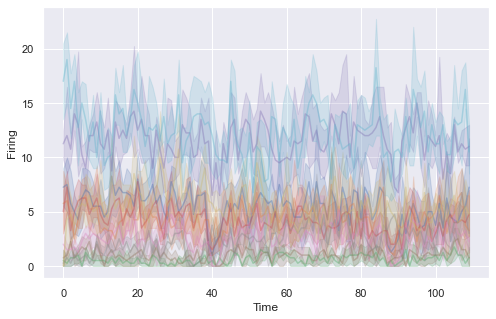

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize = (8,5))
sns.set_theme()
for k in range(10,20):
    x = np.array(list(int(i/4) for i in range(0,440))).reshape(-1,1)
    sns.lineplot(x =x.reshape(-1),y = neuron_reaction[k,4:444].reshape(-1), alpha = 0.4)

plt.xlabel('Time')
plt.ylabel('Firing')

**각 뉴런 반응성마다 scale 차이를 확인하였으며, Robust-scaling 적용.**
>Lim, S., McKee, J., Woloszyn, L. et al. Inferring learning rules from distributions of firing rates in cortical neurons. Nature Neuroscience 18, 1804–1810 (2015). https://doi.org/10.1038/nn.4158

## Delayed Propagation

![delayed_propagation](delayed_propagation.png)

편도체와 해마체의 반응속도 차이로, 편도체의 neuron firing rate 측정 단위시간은 0.2초 늦게 설정함.
(Basically, Hippocampus sends a signal to amygdala)

> Kim, W.B., Cho, JH. Encoding of contextual fear memory in hippocampal–amygdala circuit. Nature Communications 11, 1382 (2020). https://doi.org/10.1038/s41467-020-15121-2

# Analysis-Recognition Phase


**인지 과정에서 각각의 모듈에서의 반응성 분석**


 RA: Right amymgdala (우측 편도체)            LA: Left amymgdala (좌측 편도체)
 
 RH: Right hippocampus (우측 해마체)             LH: Left hippocampus (좌측 해마체)
 
+ Neruon_reaction: stimuli에 대한 뉴런의 반응성 정보
+ Neruon_reaction_m: stimuli에 대한 뉴런의 반응성 정보
+ Stimulus_type: stimuli index와 stimuli type의 mapping table

In [4]:
from utils import *

neuron_reaction, neuron_reaction_m, stimulus_type,_,_ = read_preset_recog()

## Activated Module - Box plot

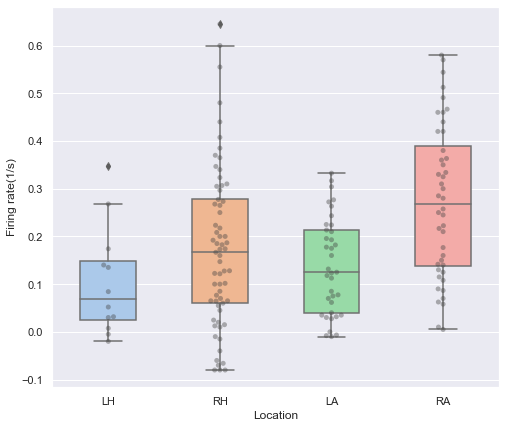

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

neuron_task = np.zeros((neuron_reaction_m.shape[0],3), dtype =np.object)
neuron_task[:,0] = neuron_reaction_m[:,2]
neuron_task[:,1] = np.mean(neuron_reaction_m[:,3:], axis = 1) #/np.sum(neuron_temp, axis = 1)

df = pd.DataFrame(neuron_task)
df[1] = pd.to_numeric(df[1])
df = data_group_filter(df, 0, 1)
df[0] = df[0].replace({'1': 'RH', '2': 'LH', '3': 'RA', '4': 'LA'})
df = df.rename(columns={0: 'Location', 1: 'Firing rate(1/s)', 2: 'Recog'})

sns.set_theme()
plt.figure(figsize = (8,7))
sns.boxplot(data =df,width = 0.5,order = ['LH','RH','LA','RA'],y='Firing rate(1/s)',x = 'Location', palette = 'pastel')
sns.swarmplot(data =df,y='Firing rate(1/s)',order = ['LH','RH','LA','RA'],x = 'Location', color = '0.25', size = 5, alpha = 0.4)
plt.show()

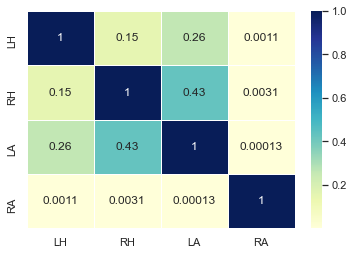

Kruskal:  0.0002446345878738805


In [6]:
p_table = np.zeros((4,4))
import scipy.stats as ss
from scipy.stats import mannwhitneyu
for e,i in enumerate(['LH', 'RH', 'LA', 'RA']):
    for e2, j in enumerate(['LH', 'RH', 'LA', 'RA']):
        H = df[(df['Location']==i)]['Firing rate(1/s)']
        M = df[(df['Location']==j)]['Firing rate(1/s)']
        _,p2 = mannwhitneyu(H, M)
        p_table[e,e2] = p2
p_table = pd.DataFrame(p_table, columns = ['LH', 'RH', 'LA', 'RA'])
p_table.index = ['LH', 'RH', 'LA', 'RA']
sns.heatmap(p_table, annot = True, linewidths=.5, cmap = 'YlGnBu')
plt.show()

LH = df[(df['Location']=='LH')]['Firing rate(1/s)']
RH = df[(df['Location']=='RH')]['Firing rate(1/s)']
LA = df[(df['Location']=='LA')]['Firing rate(1/s)']
RA = df[(df['Location']=='RA')]['Firing rate(1/s)']
print('Kruskal: ',ss.kruskal(LH,RH,LA,RA)[1])

**Right Amygdala의 반응성에서만 분포적인 차이를 확인함.**

We can estimate that neurons activation of RA are more frequently occurred 

> Tyng CM, Amin HU, Saad MNM and Malik AS (2017) The Influences of Emotion on Learning and Memory. Front. Psychol. 8:1454. doi: 10.3389/fpsyg.2017.01454

> Chau, Lily S, and Roberto Galvez. “Amygdala's involvement in facilitating associative learning-induced plasticity: a promiscuous role for the amygdala in memory acquisition.” Frontiers in integrative neuroscience vol. 6 92. 10 Oct. 2012, doi:10.3389/fnint.2012.00092

## Distributional Comparison
1. **Pairwise는 Mann whitney U-test 적용.**
1. **모든 그룹간 비교는 Kruskal wallis test 적용.**

## Sub task independence

**각각의 모듈에서 이미지를 처리할 때, 이미지 카테고리마다 분포적인 차이가 존재하는지 확인**

Furthermore, we compare neuron activation by a criterion of the task category (sub-task).

1. recognizing inorganic object (e.g., cars)
2. recognizing human face
3. recognizing landscape
4. recognizing animal

#### Additional preparation (각 Task들에 대한 average firing rate)

In [7]:
neuron_task = np.zeros((neuron_reaction.shape[0],5), dtype =np.object)
neuron_task[:,0] = neuron_reaction[:,2]
for i in range(1,5):
    temporal_n_r = neuron_reaction_m[:, 3:][:, stimulus_type[:,0]==(i+1)]
    neuron_task[:,i] = np.mean(temporal_n_r, axis =1)    

### Box plot Visualization and distributional comparison

각각의 모듈에서 각각의 sub-task들에 대하여 얼마나 잘 반응하는가에 대한
box plot representation

+ 이전과 동일하게 mann whiteny U test와 kruskal wallis test

Right Hippocampus:


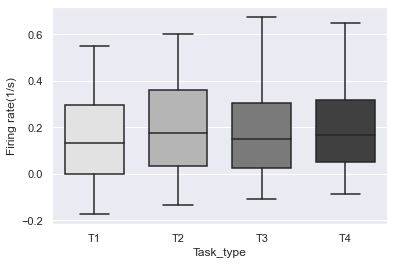

Kruskal:  0.38762149521965195
Mann Whitney:  [[1.         0.10062812 0.33613547 0.171628  ]
 [0.10062812 1.         0.57381307 0.78404508]
 [0.33613547 0.57381307 1.         0.76214417]
 [0.171628   0.78404508 0.76214417 1.        ]]

Left Hippocampus:


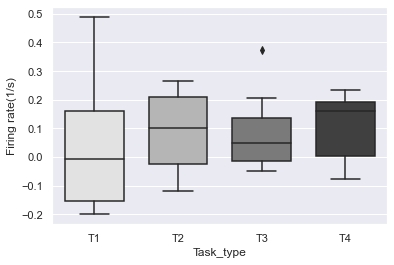

Kruskal:  0.5488386877635161
Mann Whitney:  [[1.         0.28505706 0.34035837 0.20382714]
 [0.28505706 1.         0.79483767 0.86240136]
 [0.34035837 0.79483767 1.         0.62345386]
 [0.20382714 0.86240136 0.62345386 1.        ]]

Right Amygdala:


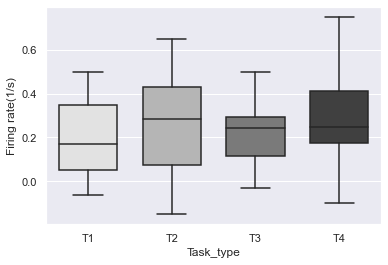

Kruskal:  0.07205430410335915
Mann Whitney:  [[1.         0.07318484 0.2917425  0.01756351]
 [0.07318484 1.         0.20198862 0.82985   ]
 [0.2917425  0.20198862 1.         0.1255555 ]
 [0.01756351 0.82985    0.1255555  1.        ]]

Left Amygdala:


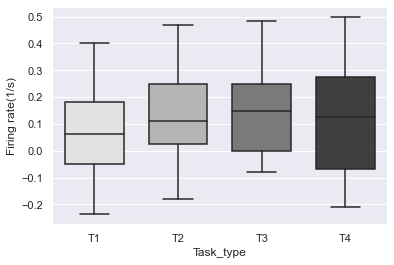

Kruskal:  0.3096835985017344
Mann Whitney:  [[1.         0.18712764 0.0895621  0.58505306]
 [0.18712764 1.         0.51642571 0.56295375]
 [0.0895621  0.51642571 1.         0.234289  ]
 [0.58505306 0.56295375 0.234289   1.        ]]



In [8]:
import seaborn as sns
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

for i,n in zip(range(1,5), ['Right Hippocampus', 'Left Hippocampus', 
                            'Right Amygdala', 'Left Amygdala']):
    
    temp_l = neuron_task[neuron_task[:,0] == str(i)].shape[0]
    temporal = np.concatenate((np.array([1]*temp_l
                                        +[2]*temp_l+[3]*temp_l+[4]*temp_l).reshape(-1,1),
                               neuron_task[neuron_task[:,0] == str(i),1:].T.reshape(-1,1)), axis = 1)
    
    print(n + ':')
    df = pd.DataFrame(temporal)
    df[1] = pd.to_numeric(df[1])
    df = data_group_filter(df, 0, 1)
    df[0] = df[0].replace({1: 'T1', 2: 'T2', 3: 'T3', 4: 'T4'})
    df = df.rename(columns={0: 'Task_type', 1: 'Firing rate(1/s)'})
    sns.set_theme()
    sns.boxplot(data =df,width = 0.7,order = ['T1','T2','T3','T4'],y='Firing rate(1/s)',x = 'Task_type', palette = 'Greys')
    plt.show()
    T = []
    for j in range(1,5):
        T.append(df[(df['Task_type']=='T'+str(j))]['Firing rate(1/s)'])
    _, p = ss.kruskal(T[0], T[1],T[2],T[3])
    print('Kruskal: ', p)
    ppp = np.zeros((4,4))
    for e in range(0,4):
        for j in range(0,4):
            _, p_ = mannwhitneyu(T[e], T[j])
            ppp[e,j] = p_
    print('Mann Whitney: ', ppp)
    print()

**오른쪽 편도체(RA)** 에서만 동물 사진 처리에서의 분포적 차이를 확인 가능.

One of the plausible explanations is viewed from the evolutionary theory. 

To recognize predators and prey, it led to neural adaptation for the dedicated processing of the aforementioned type of stimulus
> Yang, Jiongjiong et al. “Threat, domain-specificity and the human amygdala.” Neuropsychologia vol. 50,11 (2012): 2566-72. doi:10.1016/j.neuropsychologia.2012.07.001


>Mormann, F., Dubois, J., Kornblith, S. et al. A category-specific response to animals in the right human amygdala. Nature Neuroscience 14, 1247–1249 (2011). https://doi.org/10.1038/nn.2899

>Fang Z, Li H, Chen G and Yang JJ (2016) Unconscious Processing of Negative Animals and Objects: Role of the Amygdala Revealed by fMRI. Front. Hum. Neuroscience. 10:146. doi: 10.3389/fnhum.2016.00146

>Cao, Zhijun et al. “Distinct brain activity in processing negative pictures of animals and objects - the role of human contexts.” NeuroImage vol. 84 (2014): 
901-10. doi:10.1016/j.neuroimage.2013.09.064

## 편도체의 범주별 처리

해마체와 편도체 각각의 Task 처리간 상관성 비교

HippoCampus:


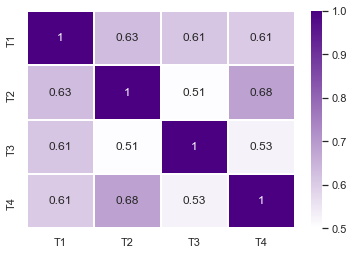

Amymgdala:


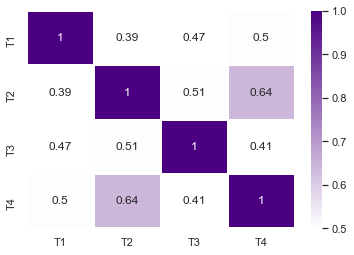

In [9]:
from matplotlib.colors import LinearSegmentedColormap

colors = ['white','indigo']
cmap = LinearSegmentedColormap.from_list('name', colors)
norm = plt.Normalize(0.5, 1)

for i,n in zip([1,3], ['HippoCampus', 'Amymgdala']):
    df = pd.DataFrame(neuron_task[neuron_task[:,0]==str(i), 1:].astype(np.float32))
    #df = data_group_filter(df, 0, 1)
    df = df.rename(columns={0: 'T1', 1: 'T2', 2: 'T3', 3: 'T4'})
    df2 = df[['T1','T2','T3','T4']].corr(method = 'spearman')
    print(n + ':')
    sns.set_theme()
    sns.heatmap(df2, annot = True,norm=norm, linewidth = 0.2,cmap=cmap)
    plt.show()

**시각적 자극** 을 처리함에 있어서 **오른쪽 편도체**에서 각 이미지 카테고리마다 처리 상관성이 약하게 나타남. (이미지의 범주별 처리)

동물적 자극(사람 얼굴, 동물 사진)에 대한 상관성은 비교적 높게 나타남.

>  Yang, Jiongjiong et al. “Threat, domain-specificity and the human amygdala.” Neuropsychologia vol. 50,11 (2012): 2566-72. doi:10.1016/j.neuropsychologia.2012.07.001

> Fang Z, Li H, Chen G and Yang JJ (2016) Unconscious Processing of Negative Animals and Objects: Role of the Amygdala Revealed by fMRI. Front. Hum. Neuroscience. 10:146. doi: 10.3389/fnhum.2016.00146

> Cao, Zhijun et al. “Distinct brain activity in processing negative pictures of animals and objects - the role of human contexts.” NeuroImage vol. 84 (2014): 
901-10. doi:10.1016/j.neuroimage.2013.09.064

# Analysis-Memorization Phase
**기억 과정에서 각각의 모듈에서의 반응성 분석**

+ Neruon_reaction: stimuli에 대한 뉴런의 반응성 정보
+ Neruon_reaction_m: stimuli에 대한 뉴런의 반응성 정보
+ Stimulus_type: stimuli index와 stimuli type의 mapping table
+ Indicies:  피실험자의 decision table 

In [20]:
from utils import *
neuron_reaction, neuron_reaction_m, stimulus_type, averages, indicies = read_preset_mem()

##  Confident (New things) 

**새로운 것이라 판단했을 때의 뉴런 맥락**


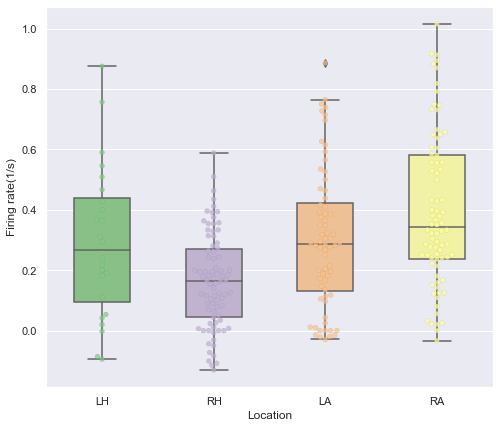

p-value table(< 0.05): 


,LH,RH,LA,RA
LH,False,True,False,False
RH,True,False,True,True
LA,False,True,False,True
RA,False,True,True,False


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
neuron_temp = ((indicies[:,3:]==31))    #* (neuron_reaction_m[:,3:] > 0)

neuron_task = np.zeros((neuron_reaction_m.shape[0],2), dtype =np.object)
neuron_task[:,0] = neuron_reaction_m[:,2]
neuron_task[:,1] = np.sum(neuron_reaction_m[:,3:]*neuron_temp, axis = 1)/np.sum(neuron_temp, axis =1)

df = pd.DataFrame(neuron_task)
df[1] = pd.to_numeric(df[1])
df = data_group_filter(df, 0, 1)
df[0] = df[0].replace({'1': 'RH', '2': 'LH', '3': 'RA', '4': 'LA'})
df = df.rename(columns={0: 'Location', 1: 'Firing rate(1/s)'})


plt.figure(figsize = (8,7))
sns.set_theme()
sns.swarmplot(data =df,linewidth = 0.1,alpha = 0.7,size = 5,order = ['LH','RH','LA','RA'],y='Firing rate(1/s)',x = 'Location', palette= 'Accent')
sns.boxplot(data =df,width = 0.5,order = ['LH','RH','LA','RA'],y='Firing rate(1/s)',x = 'Location', palette= 'Accent')
plt.show()


p_table = np.zeros((4,4))
from scipy.stats import mannwhitneyu
import scipy.stats as ss
for e,i in enumerate(['LH', 'RH', 'LA', 'RA']):
    for e2, j in enumerate(['LH', 'RH', 'LA', 'RA']):
        A = df[(df['Location']==i)]['Firing rate(1/s)']
        B = df[(df['Location']==j)]['Firing rate(1/s)']
        _,p2 = mannwhitneyu(A, B)
        p_table[e,e2] = p2

print('p-value table(< 0.05): ')
df = pd.DataFrame(p_table, columns = ['LH', 'RH', 'LA', 'RA'])
df.index = ['LH', 'RH', 'LA', 'RA']
df<0.05

## Confident (Old things)

**이전에 봤던 것이라 판단했을 때의 뉴런 맥락 (각각의 모듈에서 얼마나 잘 반응하는가)**

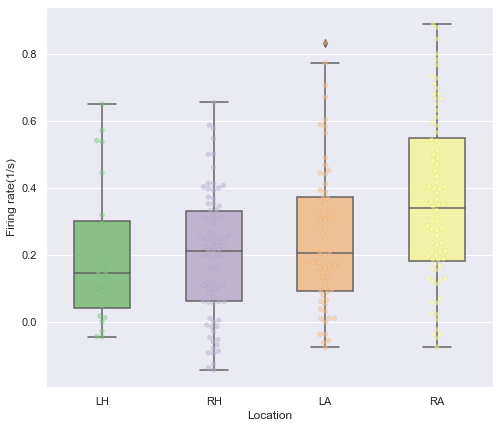

p-value table(< 0.05): 


,LH,RH,LA,RA
LH,False,False,False,True
RH,False,False,False,True
LA,False,False,False,True
RA,True,True,True,False


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

neuron_temp =  ((indicies[:,3:]==36) )

neuron_task = np.zeros((neuron_reaction_m.shape[0],2), dtype =np.object)
neuron_task[:,0] = neuron_reaction_m[:,2]
neuron_task[:,1] = np.sum(neuron_reaction_m[:,3:]*neuron_temp, axis = 1)/np.sum(neuron_temp, axis =1)

df = pd.DataFrame(neuron_task)
df[1] = pd.to_numeric(df[1])
df = data_group_filter(df, 0, 1)
df[0] = df[0].replace({'1': 'RH', '2': 'LH', '3': 'RA', '4': 'LA'})
df = df.rename(columns={0: 'Location', 1: 'Firing rate(1/s)'})

plt.figure(figsize = (8,7))
sns.set_theme()
sns.boxplot(data =df,width = 0.5,order = ['LH','RH','LA','RA'],y='Firing rate(1/s)',x = 'Location', palette= 'Accent')
sns.swarmplot(data =df, alpha = 0.5,linewidth = 0.1,size = 5,order = ['LH','RH','LA','RA'],y='Firing rate(1/s)',x = 'Location', palette= 'Accent')
plt.show()


p_table = np.zeros((4,4))
import scipy.stats as ss
for e,i in enumerate(['LH', 'RH', 'LA', 'RA']):
    for e2, j in enumerate(['LH', 'RH', 'LA', 'RA']):
        A = df[(df['Location']==i)]['Firing rate(1/s)']
        B = df[(df['Location']==j)]['Firing rate(1/s)']
        _,p2 = mannwhitneyu(A, B)
        p_table[e,e2] = p2

print('p-value table(< 0.05): ')
df = pd.DataFrame(p_table, columns = ['LH', 'RH', 'LA', 'RA'])
df.index = ['LH', 'RH', 'LA', 'RA']
df < 0.05

# Analysis-Memorization Level

**새로운 것/이전에 본 것 이라는 확신의 강도를 기준으로한 비교**

+ Low confident: guess
+ Medium confident: probably
+ High confident: confident

## As novel thing 
**처음 본 것으로 인식하였을 때**

+ Kruskal Wallis: Low, medium, high간의 전반적 분포의 차이
+ Mann whiteny U: pairwise한 분포적 차이 

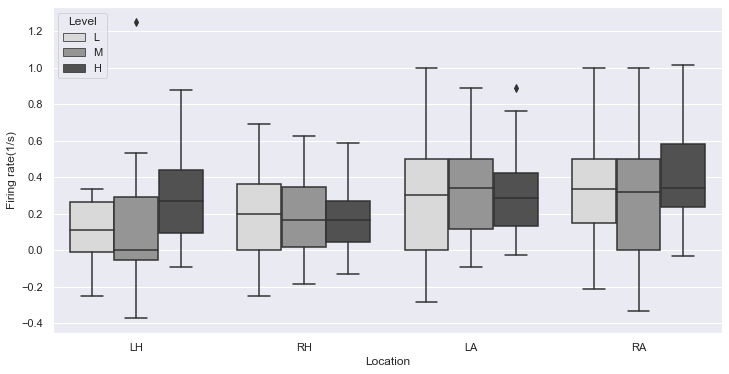

p-value table(< 0.05): 


,Overall(p-value),L-M(p-value),M-H(p-value),H-L(p-value)
LH,True,False,True,True
RH,False,False,False,False
LA,False,False,False,False
RA,False,False,False,False


In [13]:
df_cat = []
for i in [31,32,33]:
    neuron_temp =  ((indicies[:,3:].astype(np.int64)==i)) 
    neuron_task = np.zeros((np.sum(np.sum(neuron_temp, axis =1)>0),3), dtype =np.object)
    neuron_temporal = neuron_reaction_m[np.sum(neuron_temp, axis =1)>0]
    neuron_temp = neuron_temp[np.sum(neuron_temp, axis =1)>0, :]
    
    neuron_task[:,0] = neuron_temporal[:,2]
    neuron_task[:,1] = np.sum(neuron_temporal[:,3:]*neuron_temp, axis = 1)/(np.sum(neuron_temp, axis =1))
    neuron_task[:,2] = str(i)
    df = pd.DataFrame(neuron_task)
    df[1] = pd.to_numeric(df[1])
    df = data_group_filter(df, 0, 1)
    df[0] = df[0].replace({'1': 'RH', '2': 'LH', '3': 'RA', '4': 'LA'})
    df[2] = df[2].replace({'33': 'L','32':'M','31': 'H'})
    df = df.rename(columns={0: 'Location', 1: 'Firing rate(1/s)', 2: 'Level'})
    df_cat.append(df)

df_cat = pd.concat(df_cat)
plt.figure(figsize = (12,6))
sns.set_theme()
sns.boxplot(data =df_cat, palette ='Greys',hue_order = ['L','M','H'],order = ['LH','RH','LA','RA'],y='Firing rate(1/s)',x = 'Location', hue = 'Level')
plt.show()

p_table = np.zeros((4,4))
import scipy.stats as ss
for e,i in enumerate(['LH', 'RH', 'LA', 'RA']):
    H = df_cat[(df_cat['Location']==i) & (df_cat['Level']=='H')]['Firing rate(1/s)']
    M = df_cat[(df_cat['Location']==i) & (df_cat['Level']=='M')]['Firing rate(1/s)']
    L = df_cat[(df_cat['Location']==i) & (df_cat['Level']=='L')]['Firing rate(1/s)']
    _, p = ss.kruskal(H, M, L)
    _,p1 = mannwhitneyu(L, M)
    _,p2 = mannwhitneyu(H, M)
    _,p3 = mannwhitneyu(L, H)
    p_table[e,:] = [p,p1,p2,p3]

print('p-value table(< 0.05): ')
p_table = pd.DataFrame(p_table, columns = ['Overall(p-value)', 'L-M(p-value)', 'M-H(p-value)', 'H-L(p-value)'])
p_table.index = ['LH', 'RH', 'LA', 'RA']
p_table<0.05

In [26]:
df_cat[df_cat['Level']=='L'].groupby('Location').mean()

,Firing rate(1/s)
Location,
LA,0.202160
LH,0.275059
RA,0.211622
RH,0.114596


**Left Hippocampus(좌측 해마체)** 에서의 분포적 차이로 memorization level이 설명 가능함.
(Short term memory에 대한 차이로 이어짐.)

> Cohen, Sarah J, and Robert W Stackman Jr. “Assessing rodent hippocampal involvement in the novel object recognition task. A review.” Behavioural brain research vol. 285 (2015): 105-17. doi:10.1016/j.bbr.2014.08.002

## As Old thing 
**이전에 본 것으로 인식하였을 때**

+ Kruskal Wallis: Low, medium, high간의 전반적 분포의 차이
+ Mann whiteny U: pairwise한 분포적 차이 

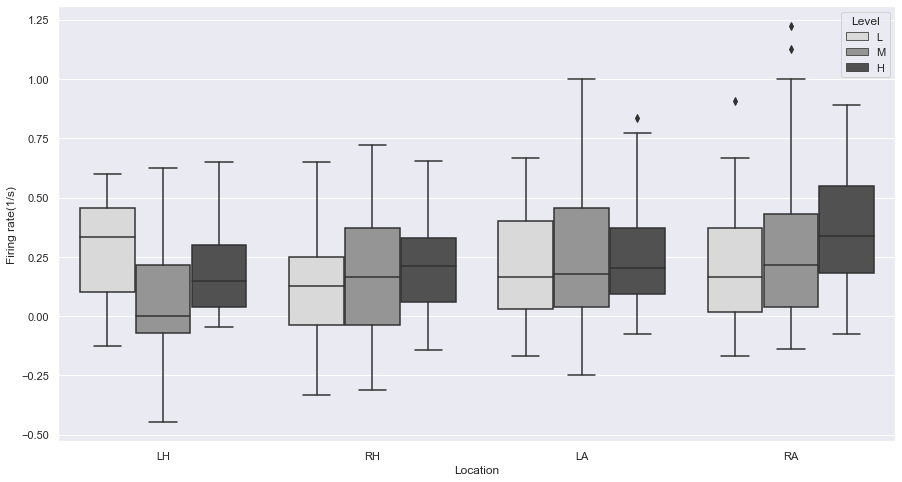

p-value table(< 0.05): 


,Overall(p-value),L-M(p-value),M-H(p-value),H-L(p-value)
LH,True,True,False,False
RH,False,False,False,True
LA,False,False,False,False
RA,True,False,True,True


In [14]:
df_cat = []
for i in [34,35,36]:
    neuron_temp =  ((indicies[:,3:].astype(np.int64)==i)) #* (neuron_reaction_m[:,3:] >0)
    neuron_task = np.zeros((np.sum(np.sum(neuron_temp, axis =1)>0),3), dtype =np.object)
    neuron_temporal = neuron_reaction_m[np.sum(neuron_temp, axis =1)>0]
    neuron_temp = neuron_temp[np.sum(neuron_temp, axis =1)>0, :]
    neuron_task[:,0] = neuron_temporal[:,2]
    neuron_task[:,1] = np.sum(neuron_temporal[:,3:]*neuron_temp, axis = 1)/(np.sum(neuron_temp, axis =1))
    neuron_task[:,2] = str(i)
    df = pd.DataFrame(neuron_task)
    df[1] = pd.to_numeric(df[1])
    df = data_group_filter(df, 0, 1)
    df[0] = df[0].replace({'1': 'RH', '2': 'LH', '3': 'RA', '4': 'LA'})
    df[2] = df[2].replace({'36': 'H','35':'M','34': 'L'})
    df = df.rename(columns={0: 'Location', 1: 'Firing rate(1/s)', 2: 'Level'})
    df_cat.append(df)
df_cat = pd.concat(df_cat)
plt.figure(figsize = (15,8))
sns.set_theme()
sns.boxplot(data =df_cat,palette ='Greys',hue_order = ['L','M','H'],order = ['LH','RH','LA','RA'],y='Firing rate(1/s)',x = 'Location', hue = 'Level')
plt.show()


p_table = np.zeros((4,4))
import scipy.stats as ss
for e,i in enumerate(['LH', 'RH', 'LA', 'RA']):
    H = df_cat[(df_cat['Location']==i) * (df_cat['Level']=='H')]['Firing rate(1/s)']
    M = df_cat[(df_cat['Location']==i) * (df_cat['Level']=='M')]['Firing rate(1/s)']
    L = df_cat[(df_cat['Location']==i) * (df_cat['Level']=='L')]['Firing rate(1/s)']
    _, p = ss.kruskal(H, M, L)
    _,p1 = mannwhitneyu(L, M)
    _,p2 = mannwhitneyu(H, M)
    _,p3 = mannwhitneyu(L, H)
    p_table[e,:] = [p,p1,p2,p3]

print('p-value table(< 0.05): ')
p_table = pd.DataFrame(p_table, columns = ['Overall(p-value)', 'L-M(p-value)', 'M-H(p-value)', 'H-L(p-value)'])
p_table.index = ['LH', 'RH', 'LA', 'RA']
p_table<0.05

**Right amymgdala(우측 편도체)** 에서의 분포적 차이로 Memorization level에 따른 차이를 설명 가능함. (Flashburb, 섬광기억에 따른 차이)

(단, LH와 RH에서의 일부 분포적 차이는 뚜렷한 설명이 어려움) 

> Kerstin Spanhel, Kathrin Wagner, Maximilian J. Geiger, Isabell Ofer, Andreas Schulze-Bonhage, Birgitta Metternich, Flashbulb memories: Is the amygdala central? An investigation of patients with amygdalar damage, Neuropsychologia 111, 2018

## Learning-Memorization HIT
**Learning phase에서의 어떤 자극에 대한 neuron의 firing rate**과

**memorization phase에서 동일한 자극에 대한 firing rate의 비례 관계 분석**

Learning phase에서 강하게 반응했을 경우, memorization phase에서도 해당 뉴런이 강하게 반응하는가?
(Concordance index 사용, 0.5 = Independent, 높을 수록 비례 관계가 강함)

In [55]:
from utils import *
neuron_reaction_mem, neuron_reaction_m_m, stimulus_type_mem, _, _ = read_preset_mem(stimuli_mode = True)
neuron_reaction_recog, neuron_reaction_m_r, stimulus_type_recog, _, _ = read_preset_recog(stimuli_mode = True)

In [60]:
for i in range(neuron_reaction_m_m.shape[0]):
    neuron_reaction_m_m[i,1] = neuron_reaction_m_m[i,0]+"_"+str(neuron_reaction_m_m[i,1])

for i in range(neuron_reaction_m_r.shape[0]):
    neuron_reaction_m_r[i,1] = neuron_reaction_m_r[i,0]+"_"+str(neuron_reaction_m_r[i,1])

neuron_reaction_m_mem = neuron_reaction_m_m[:, 1:]
neuron_reaction_m_recog = neuron_reaction_m_r[:, 1:]
idx = list(set(neuron_reaction_m_recog[:,0])&set(neuron_reaction_m_mem[:,0]))

### Bootstrap validation (Epoch: 1000)

In [61]:
from lifelines.utils import concordance_index

c_list = []
for i in range(1,5):
    selected_list = []
    for e in idx:
        locate = np.where(neuron_reaction_m_recog[:,0] == e)[0][0]
        selected_list.append(locate)
    recog = neuron_reaction_m_recog[selected_list].copy()
    recog = recog[recog[:,1] == str(i), 2:]

    selected_list = []
    for e in idx:
        locate = np.where(neuron_reaction_m_mem[:,0] == e)[0][0]
        selected_list.append(locate)
    mem = neuron_reaction_m_mem[selected_list].copy()
    mem = mem[mem[:,1] == str(i), 2:]

    pair_list = []
    for e, i in enumerate(stimulus_type_recog):
        for e2, j in enumerate(stimulus_type_mem):
            if j==i:
                pair_list.append([e, e2])

    reconstruct = None
    for p1, p2 in pair_list:
        if reconstruct is None:
            reconstruct = np.concatenate([recog[:,p1].reshape(-1,1), mem[:,p2].reshape(-1,1)], axis = 1)
        else:
            temporal = np.concatenate([recog[:,p1].reshape(-1,1), mem[:,p2].reshape(-1,1)], axis = 1)
            reconstruct = np.concatenate([reconstruct,temporal], axis = 0)
    reconstruct = reconstruct[(reconstruct[:,0]!=0)&(reconstruct[:,1]!=0)]
    
    c_idx_list= []
    for i in range(0,1000):
        b_idx = np.random.choice(reconstruct.shape[0], reconstruct.shape[0])
        c_idx_list.append(concordance_index(reconstruct[b_idx,0],reconstruct[b_idx,1]))
    c_list.append(c_idx_list)

### Box plot representation and p-value table
앞선 분석과 동일하게 pairwise하게 mannwhitney U-test

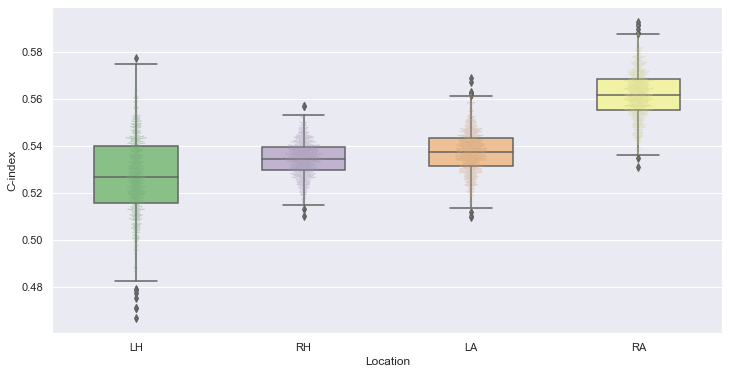

p-value table: 


,LH,RH,LA,RA
LH,1.000000e+00,5.855332e-34,2.276860e-59,0.0
RH,5.855332e-34,1.000000e+00,5.591619e-17,0.0
LA,2.276860e-59,5.591619e-17,1.000000e+00,0.0
RA,0.000000e+00,0.000000e+00,0.000000e+00,1.0


In [87]:
from scipy import stats
c_np = np.concatenate([np.array(c_list).reshape(-1,1), np.array(list(int(i/1000) for i in range(0,4000))).reshape(-1,1)], axis = 1)
df = pd.DataFrame(c_np)
df = df.rename(columns={1: 'Location', 0: 'C-index'})
df['Location'] = df['Location'].replace({0: 'RH', 1: 'LH',2: 'RA',3: 'LA'})

plt.figure(figsize = (12,6))
sns.set_theme()
sns.boxplot(data =df,width = 0.5,order = ['LH','RH','LA','RA'],y='C-index',x = 'Location', palette= 'Accent')
sns.swarmplot(data =df, alpha = 0.5,linewidth = 0.1,size = 1,order = ['LH','RH','LA','RA'],y='C-index',x = 'Location', palette= 'Accent')
plt.show()

p_table = np.zeros((4,4))
import scipy.stats as ss
for e,i in enumerate(['LH', 'RH', 'LA', 'RA']):
    for e2, j in enumerate(['LH', 'RH', 'LA', 'RA']):
        C1 = df[(df['Location']==i)]['C-index']
        C2 = df[(df['Location']==j)]['C-index']
        _,p = stats.ttest_ind(C1, C2, equal_var=False)
        p_table[e,e2] = p

print('p-value table: ')
p_table = pd.DataFrame(p_table, columns =  ['LH', 'RH', 'LA', 'RA'])
p_table.index = ['LH', 'RH', 'LA', 'RA']
p_table

**우측 편도체에서 비교적 높은 concordance index를 보임.**
신경계는 자극에 한번 노출된 후에, 중요한 자극 및 인식에 대하여 빠르게 인코딩함.

(더욱 익숙한 자극에 노출되었을 때, firing rate가 증가함)

> Rutishauser, Ueli et al. “Single-trial learning of novel stimuli by individual neurons of the human hippocampus-amygdala complex.” Neuron vol. 49,6 (2006): 805-13. doi:10.1016/j.neuron.2006.02.015